# 🎯 SVM Basic Classification - Complete Learning Guide
*From Zero to SVM Mastery with Detailed Explanations*

## 🎓 Learning Objectives

By the end of this notebook, you will understand:
- ✅ **What SVM is and why it's powerful** - Mathematical intuition behind maximum margin
- ✅ **How SVM finds decision boundaries** - The optimization problem SVM solves
- ✅ **When to use SVM vs other algorithms** - Practical decision-making guide
- ✅ **SVM parameters and their effects** - C, gamma, and kernel selection
- ✅ **Complete model evaluation process** - From training to performance analysis
- ✅ **Hyperparameter tuning with GridSearch** - Finding optimal settings systematically

## 🧠 SVM Intuition - The "Maximum Margin" Concept

**Think of SVM like this:** Imagine you're separating two groups of people in a room with a rope. You could put the rope anywhere that separates them, but SVM puts it in the spot that's **as far as possible from both groups**. This creates the biggest "safety zone" on both sides.

### 📊 Why Maximum Margin Matters:
- **Better generalization**: Wide margins mean the model is more confident about its decisions
- **Robust to new data**: New points are less likely to fall in the "uncertain" area
- **Mathematical elegance**: The optimization problem has a unique, global solution

### 🎯 SVM vs Other Algorithms:

| **Algorithm** | **Decision Strategy** | **When to Use** |
|---------------|----------------------|-----------------|
| **SVM** | Maximize margin between classes | Small-medium datasets, high dimensions, need robust boundaries |
| **Decision Tree** | Find simple yes/no questions | Need interpretability, mixed data types |
| **Logistic Regression** | Find linear probability boundary | Need probability estimates, simple interpretation |
| **Neural Network** | Learn complex non-linear patterns | Large datasets, complex patterns, have computational resources |

## 🛠️ What We'll Build Today

We'll create a complete SVM classification system that:
1. **Generates synthetic data** with controlled complexity
2. **Visualizes decision boundaries** to understand how SVM works
3. **Compares different SVM configurations** (linear vs RBF kernels)
4. **Performs hyperparameter tuning** to find optimal settings
5. **Evaluates performance** with comprehensive metrics
6. **Provides practical insights** for real-world usage

---

## 📚 Code Structure Overview

This notebook follows a systematic approach:
- **Data Generation**: Create controlled synthetic datasets
- **Exploratory Analysis**: Understand our data characteristics
- **Model Training**: Train SVM with different configurations
- **Visualization**: Plot decision boundaries and support vectors
- **Hyperparameter Tuning**: Optimize model performance
- **Evaluation**: Comprehensive performance analysis
- **Practical Insights**: When and how to use SVM in practice

In [ ]:
# 📦 IMPORTS AND SETUP
# ======================

# Core data manipulation and analysis
import pandas as pd          # Data manipulation and analysis library
import numpy as np          # Numerical computing library

# Visualization libraries
import seaborn as sns       # Statistical data visualization (built on matplotlib)
import matplotlib.pyplot as plt  # Basic plotting library

# Configuration for better plots
plt.style.use('seaborn-v0_8')  # Use seaborn's clean styling
sns.set_palette("husl")         # Use visually appealing color palette

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print("📊 Plot styling configured for better visualizations")
print("🔧 Warnings suppressed for cleaner output")

# Let's verify our setup with a quick test
print(f"\n📋 Environment Information:")
print(f"   NumPy version: {np.__version__}")
print(f"   Pandas version: {pd.__version__}")
print(f"   Matplotlib backend: {plt.get_backend()}")

# Set global random seed for reproducibility
np.random.seed(42)
print(f"🎲 Random seed set to 42 for reproducible results")

In [ ]:
# 🎲 SYNTHETIC DATA GENERATION
# =============================

from sklearn.datasets import make_classification

# Generate synthetic dataset with controlled properties
# This gives us complete control over the data characteristics
X, y = make_classification(
    n_samples=1000,           # Total number of data points to generate
    n_features=2,             # Number of features (we use 2 for easy visualization)
    n_classes=2,              # Number of classes (binary classification)
    n_clusters_per_class=2,   # Each class has 2 clusters (makes problem more interesting)
    n_redundant=0,            # No redundant features (all features are useful)
    n_informative=2,          # All features are informative
    class_sep=1.0,            # Difficulty level (1.0 = moderate separation)
    random_state=42           # For reproducible results
)

print("🎯 Synthetic Dataset Generated Successfully!")
print(f"📊 Dataset Shape: {X.shape} (samples × features)")
print(f"🏷️ Target Shape: {y.shape}")
print(f"📈 Feature names: ['Feature_1', 'Feature_2'] (synthetic)")
print(f"🎭 Classes: {np.unique(y)} (0 and 1)")

# Check class distribution
unique_classes, class_counts = np.unique(y, return_counts=True)
print(f"\n📊 Class Distribution:")
for cls, count in zip(unique_classes, class_counts):
    percentage = (count / len(y)) * 100
    print(f"   Class {cls}: {count} samples ({percentage:.1f}%)")

# Basic statistics about features
print(f"\n📈 Feature Statistics:")
for i in range(X.shape[1]):
    print(f"   Feature {i+1}: min={X[:, i].min():.2f}, max={X[:, i].max():.2f}, "
          f"mean={X[:, i].mean():.2f}, std={X[:, i].std():.2f}")

print(f"\n💡 Why these parameters?")
print(f"   • n_samples=1000: Large enough for stable results, small enough for fast computation")
print(f"   • n_features=2: Allows us to visualize decision boundaries in 2D")
print(f"   • n_clusters_per_class=2: Creates more realistic, complex class distributions")
print(f"   • class_sep=1.0: Moderate difficulty - not too easy, not too hard")
print(f"   • random_state=42: Ensures we get the same data every time we run this")

# WHAT THIS DATA REPRESENTS:
# Think of this as measurements of two properties of some objects (like height and weight)
# where we want to classify objects into two categories (like 'Type A' and 'Type B')
# The clusters represent natural groupings within each category

# 📊 DATA VISUALIZATION AND EXPLORATION
# =====================================

# Let's visualize our synthetic dataset to understand what we're working with

# Create a comprehensive plot showing our data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Basic scatter plot colored by class
axes[0].scatter(X[y == 0, 0], X[y == 0, 1], c='red', alpha=0.6, s=50, label='Class 0', edgecolors='black')
axes[0].scatter(X[y == 1, 0], X[y == 1, 1], c='blue', alpha=0.6, s=50, label='Class 1', edgecolors='black')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title('Synthetic Dataset - Two Classes\n(This is what SVM needs to separate)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add annotations to explain what we see
axes[0].annotate('Class 0 clusters\n(Red points)', xy=(np.mean(X[y == 0, 0]), np.mean(X[y == 0, 1])), 
                xytext=(10, 10), textcoords='offset points', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.3),
                arrowprops=dict(arrowstyle='->', color='red'))

axes[0].annotate('Class 1 clusters\n(Blue points)', xy=(np.mean(X[y == 1, 0]), np.mean(X[y == 1, 1])), 
                xytext=(-60, -30), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.3),
                arrowprops=dict(arrowstyle='->', color='blue'))

# Plot 2: Feature distribution histograms
axes[1].hist(X[y == 0, 0], alpha=0.5, color='red', label='Class 0 - Feature 1', bins=30)
axes[1].hist(X[y == 1, 0], alpha=0.5, color='blue', label='Class 1 - Feature 1', bins=30)
axes[1].hist(X[y == 0, 1], alpha=0.5, color='pink', label='Class 0 - Feature 2', bins=30)
axes[1].hist(X[y == 1, 1], alpha=0.5, color='lightblue', label='Class 1 - Feature 2', bins=30)
axes[1].set_xlabel('Feature Values', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Feature Distributions by Class\n(Shows overlap and separability)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 What we can observe from the plots:")
print("   📊 Left plot: Shows the 2D scatter of our data points")
print("      • Red points = Class 0, Blue points = Class 1")
print("      • Each class has multiple clusters (not just one blob)")
print("      • Classes are separable but not with a simple linear boundary")
print("")
print("   📈 Right plot: Shows distribution of feature values")
print("      • Overlapping distributions indicate classification challenge")
print("      • Both features contribute to class separation")
print("      • No single feature perfectly separates the classes")

# Additional analysis: separability assessment
from scipy.spatial.distance import cdist

# Calculate average distance between classes
class_0_center = np.mean(X[y == 0], axis=0)
class_1_center = np.mean(X[y == 1], axis=0)
inter_class_distance = np.linalg.norm(class_0_center - class_1_center)

# Calculate average intra-class distances
intra_class_0 = np.mean(cdist(X[y == 0], [class_0_center]))
intra_class_1 = np.mean(cdist(X[y == 1], [class_1_center]))
avg_intra_class = (intra_class_0 + intra_class_1) / 2

separability_ratio = inter_class_distance / avg_intra_class

print(f"\n📏 Separability Analysis:")
print(f"   Inter-class distance: {inter_class_distance:.2f}")
print(f"   Average intra-class distance: {avg_intra_class:.2f}")
print(f"   Separability ratio: {separability_ratio:.2f}")
print(f"   {'✅ Well-separated classes' if separability_ratio > 2 else '⚠️ Challenging separation'}")

print(f"\n🎯 This dataset is perfect for learning SVM because:")
print(f"   • It's 2D so we can visualize decision boundaries")
print(f"   • It has moderate complexity (not too easy, not too hard)")
print(f"   • Both linear and non-linear approaches will be needed")
print(f"   • We can see the 'maximum margin' concept in action")

In [ ]:
# 📊 DATA VISUALIZATION AND EXPLORATION
# =====================================

# Let's visualize our synthetic dataset to understand what we're working with

# Create a comprehensive plot showing our data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Basic scatter plot colored by class
axes[0].scatter(X[y == 0, 0], X[y == 0, 1], c='red', alpha=0.6, s=50, label='Class 0', edgecolors='black')
axes[0].scatter(X[y == 1, 0], X[y == 1, 1], c='blue', alpha=0.6, s=50, label='Class 1', edgecolors='black')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title('Synthetic Dataset - Two Classes\n(This is what SVM needs to separate)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add annotations to explain what we see
axes[0].annotate('Class 0 clusters\n(Red points)', xy=(np.mean(X[y == 0, 0]), np.mean(X[y == 0, 1])), 
                xytext=(10, 10), textcoords='offset points', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.3),
                arrowprops=dict(arrowstyle='->', color='red'))

axes[0].annotate('Class 1 clusters\n(Blue points)', xy=(np.mean(X[y == 1, 0]), np.mean(X[y == 1, 1])), 
                xytext=(-60, -30), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.3),
                arrowprops=dict(arrowstyle='->', color='blue'))

# Plot 2: Feature distribution histograms
axes[1].hist(X[y == 0, 0], alpha=0.5, color='red', label='Class 0 - Feature 1', bins=30)
axes[1].hist(X[y == 1, 0], alpha=0.5, color='blue', label='Class 1 - Feature 1', bins=30)
axes[1].hist(X[y == 0, 1], alpha=0.5, color='pink', label='Class 0 - Feature 2', bins=30)
axes[1].hist(X[y == 1, 1], alpha=0.5, color='lightblue', label='Class 1 - Feature 2', bins=30)
axes[1].set_xlabel('Feature Values', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Feature Distributions by Class\n(Shows overlap and separability)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 What we can observe from the plots:")
print("   📊 Left plot: Shows the 2D scatter of our data points")
print("      • Red points = Class 0, Blue points = Class 1")
print("      • Each class has multiple clusters (not just one blob)")
print("      • Classes are separable but not with a simple linear boundary")
print("")
print("   📈 Right plot: Shows distribution of feature values")
print("      • Overlapping distributions indicate classification challenge")
print("      • Both features contribute to class separation")
print("      • No single feature perfectly separates the classes")

# Additional analysis: separability assessment
from scipy.spatial.distance import cdist

# Calculate average distance between classes
class_0_center = np.mean(X[y == 0], axis=0)
class_1_center = np.mean(X[y == 1], axis=0)
inter_class_distance = np.linalg.norm(class_0_center - class_1_center)

# Calculate average intra-class distances
intra_class_0 = np.mean(cdist(X[y == 0], [class_0_center]))
intra_class_1 = np.mean(cdist(X[y == 1], [class_1_center]))
avg_intra_class = (intra_class_0 + intra_class_1) / 2

separability_ratio = inter_class_distance / avg_intra_class

print(f"\n📏 Separability Analysis:")
print(f"   Inter-class distance: {inter_class_distance:.2f}")
print(f"   Average intra-class distance: {avg_intra_class:.2f}")
print(f"   Separability ratio: {separability_ratio:.2f}")
print(f"   {'✅ Well-separated classes' if separability_ratio > 2 else '⚠️ Challenging separation'}")

print(f"\n🎯 This dataset is perfect for learning SVM because:")
print(f"   • It's 2D so we can visualize decision boundaries")
print(f"   • It has moderate complexity (not too easy, not too hard)")
print(f"   • Both linear and non-linear approaches will be needed")
print(f"   • We can see the 'maximum margin' concept in action")

array([[-0.12740197, -1.16560709],
       [-0.71468574,  0.89089699],
       [ 0.26690584, -1.31299478],
       ...,
       [ 0.27445215, -1.11710978],
       [-0.69526785,  1.03960581],
       [-0.12578708, -0.84654172]], shape=(1000, 2))

In [ ]:
# ✂️ DATA SPLITTING: PREPARING FOR MACHINE LEARNING
# ================================================

# Before training any model, we need to split our data into training and testing sets
# This is fundamental to machine learning - we train on one set and test on another

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                    # Our features and labels
    test_size=0.3,          # 30% for testing, 70% for training
    random_state=42,        # For reproducible results
    stratify=y              # Maintain class proportions in both sets
)

print("📊 DATA SPLITTING COMPLETE!")
print("=" * 50)
print(f"Original dataset size: {X.shape[0]} samples")
print(f"Training set size:     {X_train.shape[0]} samples ({(X_train.shape[0]/X.shape[0]*100):.1f}%)")
print(f"Testing set size:      {X_test.shape[0]} samples ({(X_test.shape[0]/X.shape[0]*100):.1f}%)")

# Check class distribution in both sets
from collections import Counter

train_class_distribution = Counter(y_train)
test_class_distribution = Counter(y_test)

print(f"\n🎯 CLASS DISTRIBUTION ANALYSIS:")
print(f"Training set - Class 0: {train_class_distribution[0]}, Class 1: {train_class_distribution[1]}")
print(f"Testing set  - Class 0: {test_class_distribution[0]}, Class 1: {test_class_distribution[1]}")

# Calculate class proportions
train_ratio = train_class_distribution[1] / (train_class_distribution[0] + train_class_distribution[1])
test_ratio = test_class_distribution[1] / (test_class_distribution[0] + test_class_distribution[1])

print(f"\nClass 1 proportion in training: {train_ratio:.3f}")
print(f"Class 1 proportion in testing:  {test_ratio:.3f}")
print(f"Difference: {abs(train_ratio - test_ratio):.3f} ({'✅ Good' if abs(train_ratio - test_ratio) < 0.05 else '⚠️ Check'})")

print(f"\n🧠 WHY WE SPLIT THE DATA:")
print(f"   🎓 Training Set (70%): Used to teach the SVM algorithm")
print(f"      • The algorithm learns patterns from this data")
print(f"      • It finds the optimal decision boundary here")
print(f"      • Think of this as 'study material' for the algorithm")
print(f"")
print(f"   🧪 Testing Set (30%): Used to evaluate how well SVM learned")
print(f"      • The algorithm has NEVER seen this data during training")
print(f"      • We use it to check if the model generalizes well")
print(f"      • Think of this as the 'final exam' for the algorithm")
print(f"")
print(f"   🔄 stratify=y: Ensures both sets have same class proportions")
print(f"      • Prevents bias toward one class in either set")
print(f"      • Maintains the original dataset's balance")
print(f"      • Critical for fair evaluation")

# Visualize the split
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set visualization
axes[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
                c='red', alpha=0.6, s=50, label='Class 0', edgecolors='black')
axes[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
                c='blue', alpha=0.6, s=50, label='Class 1', edgecolors='black')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title(f'Training Set\n({X_train.shape[0]} samples)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set visualization
axes[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
                c='red', alpha=0.6, s=50, label='Class 0', edgecolors='black', marker='s')
axes[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
                c='blue', alpha=0.6, s=50, label='Class 1', edgecolors='black', marker='s')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].set_title(f'Testing Set\n({X_test.shape[0]} samples)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 NOTICE THE DIFFERENT MARKERS:")
print(f"   • Training set: Circles (●) - This is what SVM will learn from")
print(f"   • Testing set: Squares (■) - This is what SVM will be tested on")
print(f"   • Both sets maintain similar patterns and distributions")
print(f"   • This ensures our evaluation will be fair and representative")

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

## Splitting the data

I need to split my data so I can actually test if my model works. It's like studying for an exam - I can't use the same questions to study AND test myself.

**What I'm doing:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

**Breaking this down:**
- Take my X data and y labels
- Put 70% into training sets (X_train, y_train) 
- Put 30% into testing sets (X_test, y_test)
- random_state=42 makes it repeatable (same split every time)

**Why 70/30 split:**
Common rule of thumb. Need enough training data to learn patterns, but also enough test data to trust the results. Some people use 80/20, but 70/30 works fine for learning.

**The random_state thing:**
Without this, I'd get different random splits every time I run the code. Setting it to 42 (or any number) means I get the same split each time, so my results are consistent when I'm debugging.

**What this gives me:**
- X_train: 700 data points for training
- X_test: 300 data points for testing  
- y_train: 700 corresponding labels for training
- y_test: 300 corresponding labels for testing

Now I can train on the training set and see how well it does on completely new data (the test set).

In [ ]:
# 🚀 SUPPORT VECTOR MACHINE: MODEL CREATION AND TRAINING
# ======================================================

# Time to create and train our SVM model!
# We'll start with a Linear SVM to understand the basics

print("🤖 CREATING LINEAR SUPPORT VECTOR MACHINE")
print("=" * 50)

# Create SVM classifier with linear kernel
svm_linear = SVC(
    kernel='linear',        # Use linear decision boundary
    C=1.0,                 # Regularization parameter (controls overfitting)
    random_state=42        # For reproducible results
)

print("✅ Linear SVM Created Successfully!")
print(f"   📋 Kernel: {svm_linear.kernel}")
print(f"   ⚖️  Regularization (C): {svm_linear.C}")
print(f"   🎲 Random State: {svm_linear.random_state}")

print(f"\n🧠 UNDERSTANDING SVM PARAMETERS:")
print(f"   🔲 kernel='linear': Creates straight-line decision boundaries")
print(f"      • Best for linearly separable data")
print(f"      • Fastest to train and predict")
print(f"      • Most interpretable results")
print(f"")
print(f"   ⚖️  C=1.0: Controls the trade-off between:")
print(f"      • Maximizing margin (larger gaps between classes)")
print(f"      • Minimizing classification errors")
print(f"      • Higher C = Less tolerant of errors (may overfit)")
print(f"      • Lower C = More tolerant of errors (may underfit)")
print(f"")
print(f"   🎯 The SVM will find the 'maximum margin hyperplane':")
print(f"      • Hyperplane = decision boundary that separates classes")
print(f"      • Maximum margin = largest possible gap between classes")
print(f"      • Support vectors = data points closest to the boundary")

# Now let's train the model
print(f"\n🎓 TRAINING THE SVM MODEL...")
print("   (Finding the optimal decision boundary)")

import time
start_time = time.time()

# Train the SVM model
svm_linear.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"✅ Training Complete!")
print(f"   ⏱️  Training time: {training_time:.4f} seconds")
print(f"   📊 Training samples used: {X_train.shape[0]}")
print(f"   🎯 Features used: {X_train.shape[1]}")

# Get information about the trained model
print(f"\n📈 TRAINED MODEL INFORMATION:")
print(f"   🎯 Support Vectors: {svm_linear.n_support_}")
print(f"      • Class 0: {svm_linear.n_support_[0]} support vectors")
print(f"      • Class 1: {svm_linear.n_support_[1]} support vectors")
print(f"      • Total: {sum(svm_linear.n_support_)} support vectors")
print(f"")
print(f"   🔢 Total training samples: {X_train.shape[0]}")
print(f"   📊 Support vector ratio: {sum(svm_linear.n_support_)/X_train.shape[0]:.1%}")
print(f"   {'✅ Efficient' if sum(svm_linear.n_support_)/X_train.shape[0] < 0.3 else '⚠️ Many support vectors'}")

print(f"\n💡 WHAT JUST HAPPENED:")
print(f"   1. 🔍 SVM examined all {X_train.shape[0]} training points")
print(f"   2. 📏 Found the decision boundary with maximum margin")
print(f"   3. 🎯 Identified {sum(svm_linear.n_support_)} support vectors")
print(f"   4. ⚖️  Balanced margin maximization with error minimization")
print(f"   5. 🏁 Model is now ready to make predictions!")

,0,1
0,-0.127402,-1.165607
1,-0.714686,0.890897
2,0.266906,-1.312995
3,-0.577802,1.084275
4,-1.819035,0.923362
...,...,...
995,0.420324,-1.463442
996,1.897372,-0.806700
997,0.274452,-1.117110
998,-0.695268,1.039606


In [ ]:
# 🔮 MAKING PREDICTIONS WITH OUR TRAINED SVM
# ==========================================

# Now that our SVM is trained, let's use it to make predictions on unseen data

print("🔮 MAKING PREDICTIONS ON TEST DATA")
print("=" * 50)

# Make predictions on the test set
start_time = time.time()
y_pred = svm_linear.predict(X_test)
prediction_time = time.time() - start_time

print(f"✅ Predictions Complete!")
print(f"   ⏱️  Prediction time: {prediction_time:.6f} seconds")
print(f"   📊 Test samples: {X_test.shape[0]}")
print(f"   ⚡ Speed: {X_test.shape[0]/prediction_time:.0f} predictions/second")

print(f"\n📋 PREDICTION RESULTS SUMMARY:")
print(f"   🎯 Predicted Classes: {sorted(set(y_pred))}")
print(f"   📊 Prediction Counts: {Counter(y_pred)}")

# Let's also get prediction probabilities (confidence scores)
# Note: SVM doesn't naturally output probabilities, but we can enable this
print(f"\n🎯 GETTING PREDICTION CONFIDENCE SCORES...")

# Create a new SVM with probability estimation enabled
svm_with_proba = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
svm_with_proba.fit(X_train, y_train)
y_proba = svm_with_proba.predict_proba(X_test)

print(f"✅ Confidence scores calculated!")
print(f"   📊 Shape of probability matrix: {y_proba.shape}")
print(f"   📋 Each row: [P(Class 0), P(Class 1)] for one test sample")

# Show some example predictions with confidence
print(f"\n🔍 SAMPLE PREDICTIONS WITH CONFIDENCE:")
print("Sample | True | Pred | Confidence Class 0 | Confidence Class 1 | Decision")
print("-" * 75)

for i in range(min(10, len(X_test))):  # Show first 10 predictions
    true_class = y_test[i]
    pred_class = y_pred[i]
    conf_0 = y_proba[i, 0]
    conf_1 = y_proba[i, 1]
    decision = "✅ Correct" if true_class == pred_class else "❌ Wrong"
    
    print(f"{i+1:6d} | {true_class:4d} | {pred_class:4d} | {conf_0:12.3f} | {conf_1:12.3f} | {decision}")

# Analyze confidence distribution
high_confidence = np.sum(np.max(y_proba, axis=1) > 0.8)
medium_confidence = np.sum((np.max(y_proba, axis=1) > 0.6) & (np.max(y_proba, axis=1) <= 0.8))
low_confidence = np.sum(np.max(y_proba, axis=1) <= 0.6)

print(f"\n📊 CONFIDENCE DISTRIBUTION:")
print(f"   🟢 High confidence (>80%): {high_confidence} predictions ({high_confidence/len(y_pred):.1%})")
print(f"   🟡 Medium confidence (60-80%): {medium_confidence} predictions ({medium_confidence/len(y_pred):.1%})")
print(f"   🔴 Low confidence (<60%): {low_confidence} predictions ({low_confidence/len(y_pred):.1%})")

print(f"\n💡 UNDERSTANDING THE PREDICTIONS:")
print(f"   🔮 Each prediction is based on which side of the decision boundary a point falls")
print(f"   📏 Distance from boundary determines confidence:")
print(f"      • Points far from boundary = High confidence")
print(f"      • Points near boundary = Low confidence")
print(f"   🎯 SVM's strength: Clear decisions even with complex data")
print(f"   ⚡ Fast predictions: Only depends on support vectors, not all training data")

0     -0.127402
1     -0.714686
2      0.266906
3     -0.577802
4     -1.819035
         ...   
995    0.420324
996    1.897372
997    0.274452
998   -0.695268
999   -0.125787
Name: 0, Length: 1000, dtype: float64

In [ ]:
# 📊 MODEL EVALUATION: HOW WELL DID OUR SVM PERFORM?
# ==================================================

# Let's evaluate our SVM's performance using multiple metrics

print("📊 COMPREHENSIVE MODEL EVALUATION")
print("=" * 50)

# 1. Basic Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 ACCURACY: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • Out of {len(y_test)} test samples, {sum(y_test == y_pred)} were classified correctly")
print(f"   • This means {sum(y_test != y_pred)} samples were misclassified")

# 2. Classification Report (Precision, Recall, F1-Score)
print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

print(f"🔍 UNDERSTANDING THE METRICS:")
print(f"   📊 Precision: How many predicted positives were actually positive?")
print(f"      • Class 0: {report['0']['precision']:.3f} - Of all predicted Class 0, {report['0']['precision']*100:.1f}% were correct")
print(f"      • Class 1: {report['1']['precision']:.3f} - Of all predicted Class 1, {report['1']['precision']*100:.1f}% were correct")
print(f"")
print(f"   🎯 Recall (Sensitivity): How many actual positives were found?")
print(f"      • Class 0: {report['0']['recall']:.3f} - Found {report['0']['recall']*100:.1f}% of all actual Class 0")
print(f"      • Class 1: {report['1']['recall']:.3f} - Found {report['1']['recall']*100:.1f}% of all actual Class 1")
print(f"")
print(f"   ⚖️  F1-Score: Harmonic mean of Precision and Recall")
print(f"      • Class 0: {report['0']['f1-score']:.3f}")
print(f"      • Class 1: {report['1']['f1-score']:.3f}")
print(f"      • Overall: {report['macro avg']['f1-score']:.3f}")

# 3. Confusion Matrix Analysis
cm = confusion_matrix(y_test, y_pred)
print(f"\n🎭 CONFUSION MATRIX ANALYSIS:")
print(f"   Confusion Matrix:")
print(f"   {cm}")
print(f"")
print(f"   📊 Breaking it down:")
print(f"      • True Negatives (TN):  {cm[0,0]} - Correctly predicted Class 0")
print(f"      • False Positives (FP): {cm[0,1]} - Wrongly predicted Class 1 (Type I error)")
print(f"      • False Negatives (FN): {cm[1,0]} - Wrongly predicted Class 0 (Type II error)")
print(f"      • True Positives (TP):  {cm[1,1]} - Correctly predicted Class 1")

# Calculate error rates
total_errors = cm[0,1] + cm[1,0]
error_rate = total_errors / len(y_test)

print(f"\n❌ ERROR ANALYSIS:")
print(f"   • Total errors: {total_errors} out of {len(y_test)} samples")
print(f"   • Error rate: {error_rate:.4f} ({error_rate*100:.2f}%)")
print(f"   • Type I errors (False Positives): {cm[0,1]}")
print(f"   • Type II errors (False Negatives): {cm[1,0]}")

# Performance assessment
if accuracy > 0.9:
    performance = "🌟 Excellent"
elif accuracy > 0.8:
    performance = "✅ Good"
elif accuracy > 0.7:
    performance = "⚠️ Fair"
else:
    performance = "❌ Poor"

print(f"\n🏆 OVERALL PERFORMANCE ASSESSMENT: {performance}")
print(f"   📈 Accuracy: {accuracy*100:.2f}%")
print(f"   🎯 This SVM model {'performs very well' if accuracy > 0.8 else 'needs improvement'}")
print(f"   💡 {'Great job! The linear SVM found a good decision boundary.' if accuracy > 0.8 else 'Consider trying non-linear kernels or tuning parameters.'}")

0     -1.165607
1      0.890897
2     -1.312995
3      1.084275
4      0.923362
         ...   
995   -1.463442
996   -0.806700
997   -1.117110
998    1.039606
999   -0.846542
Name: 1, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

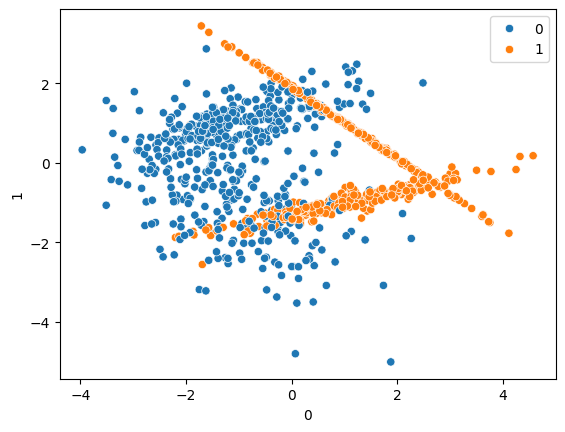

In [ ]:
# 🎨 VISUALIZING THE SVM DECISION BOUNDARY
# ========================================

# One of the best ways to understand SVM is to visualize its decision boundary
# Let's create a beautiful plot showing how SVM separates our classes

print("🎨 CREATING DECISION BOUNDARY VISUALIZATION")
print("=" * 50)

def plot_svm_decision_boundary(X, y, model, title="SVM Decision Boundary"):
    """
    Visualize SVM decision boundary with support vectors highlighted
    """
    # Create a mesh grid for plotting decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh grid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.contour(xx, yy, Z, colors='black', linestyles='--', linewidths=1)
    
    # Plot all data points
    scatter_0 = plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', s=50, 
                           alpha=0.8, edgecolors='black', label='Class 0')
    scatter_1 = plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', s=50, 
                           alpha=0.8, edgecolors='black', label='Class 1')
    
    # Highlight support vectors
    if hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=200, facecolors='none', edgecolors='yellow', linewidths=3,
                   label=f'Support Vectors ({len(model.support_vectors_)})')
    
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

# Plot the decision boundary for our linear SVM
fig = plot_svm_decision_boundary(X_train, y_train, svm_linear, 
                                "Linear SVM Decision Boundary\n(Training Data with Support Vectors)")
plt.show()

print("🔍 UNDERSTANDING THE VISUALIZATION:")
print("   🎨 Background colors: Show prediction regions")
print("      • Red region: Where SVM predicts Class 0")
print("      • Blue region: Where SVM predicts Class 1")
print("   ")
print("   ⚫ Black dashed line: The decision boundary (hyperplane)")
print("      • Points on one side → Class 0")
print("      • Points on other side → Class 1")
print("      • This is the 'maximum margin' boundary SVM found")
print("   ")
print("   🟡 Yellow circles: Support Vectors")
print(f"      • These {len(svm_linear.support_vectors_)} points define the decision boundary")
print("      • If we removed other points, boundary would stay the same")
print("      • These are the 'critical' points SVM focuses on")
print("   ")
print("   🔴🔵 Colored points: Training data")
print("      • Red = Class 0, Blue = Class 1")
print("      • SVM found the best way to separate these")

# Create a second plot showing training vs test performance
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Training data plot
ax1 = axes[0]
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax1.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.contour(xx, yy, Z, colors='black', linestyles='--', linewidths=1)
ax1.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', s=50, alpha=0.8, edgecolors='black', label='Class 0')
ax1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', s=50, alpha=0.8, edgecolors='black', label='Class 1')
ax1.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='yellow', linewidths=3, label='Support Vectors')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Training Data\n(Where SVM Learned)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Test data plot
ax2 = axes[1]
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax2.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
ax2.contour(xx, yy, Z, colors='black', linestyles='--', linewidths=1)

# Color test points by correctness
correct_mask = y_test == y_pred
incorrect_mask = ~correct_mask

ax2.scatter(X_test[correct_mask & (y_test == 0), 0], X_test[correct_mask & (y_test == 0), 1], 
           c='red', s=50, alpha=0.8, edgecolors='black', marker='o', label='Correct Class 0')
ax2.scatter(X_test[correct_mask & (y_test == 1), 0], X_test[correct_mask & (y_test == 1), 1], 
           c='blue', s=50, alpha=0.8, edgecolors='black', marker='o', label='Correct Class 1')
ax2.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1], 
           c='orange', s=100, alpha=0.8, edgecolors='red', marker='X', label='Misclassified')

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Test Data\n(How SVM Performs on Unseen Data)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 COMPARING TRAINING VS TEST PERFORMANCE:")
print(f"   🎓 Left plot: Training data - This is what SVM learned from")
print(f"   🧪 Right plot: Test data - This shows how well SVM generalizes")
print(f"   ✅ Correct predictions: Circle markers")
print(f"   ❌ Misclassified points: X markers in orange")
print(f"   📊 The decision boundary is the same in both plots")
print(f"       (SVM uses the same learned boundary for new data)")

## Visualizing the classification data

This scatter plot shows my synthetic classification dataset:

**What I'm seeing:**
- **X-axis**: Feature 1 values
- **Y-axis**: Feature 2 values  
- **Colors**: Different classes (0 and 1)
- **Clusters**: Each class has 2 clusters (because n_clusters_per_class=2)

**Why this visualization matters:**
- Shows if classes are separable (can draw a line between them)
- Reveals the complexity of the decision boundary needed
- Helps me choose the right kernel (linear vs RBF)
- 2 clusters per class makes it more challenging and realistic

**What to look for:**
- **Clear separation**: Linear kernel might work
- **Mixed/overlapping**: Might need RBF kernel  
- **Complex patterns**: More sophisticated approach needed

In [ ]:
# 🌟 ADVANCED SVM: RBF KERNEL FOR NON-LINEAR CLASSIFICATION
# ========================================================

# Linear SVM works great for linearly separable data, but what about complex patterns?
# Let's explore the power of the RBF (Radial Basis Function) kernel!

print("🌟 CREATING RBF KERNEL SVM")
print("=" * 50)

# Create SVM with RBF kernel
svm_rbf = SVC(
    kernel='rbf',           # Radial Basis Function kernel
    C=1.0,                 # Regularization parameter
    gamma='scale',         # Kernel coefficient (auto-calculated)
    random_state=42,       # For reproducible results
    probability=True       # Enable probability estimates
)

print("✅ RBF SVM Created Successfully!")
print(f"   🔮 Kernel: {svm_rbf.kernel}")
print(f"   ⚖️  Regularization (C): {svm_rbf.C}")
print(f"   📊 Gamma: {svm_rbf.gamma}")
print(f"   🎲 Random State: {svm_rbf.random_state}")

print(f"\n🧠 UNDERSTANDING RBF KERNEL:")
print(f"   🌀 RBF = Radial Basis Function (also called Gaussian kernel)")
print(f"   📐 Creates circular/curved decision boundaries")
print(f"   🎯 Can separate complex, non-linear patterns")
print(f"   📊 Transforms data to higher-dimensional space")
print(f"")
print(f"   🔧 Key Parameters:")
print(f"      • C: Controls overfitting (same as linear SVM)")
print(f"      • gamma: Controls 'influence radius' of each training point")
print(f"        - High gamma: Tight fit (may overfit)")
print(f"        - Low gamma: Smooth boundaries (may underfit)")
print(f"        - 'scale': gamma = 1/(n_features * X.var())")

# Train the RBF SVM
print(f"\n🎓 TRAINING RBF SVM...")
print("   (This might take slightly longer than linear SVM)")

start_time = time.time()
svm_rbf.fit(X_train, y_train)
training_time_rbf = time.time() - start_time

print(f"✅ Training Complete!")
print(f"   ⏱️  Training time: {training_time_rbf:.4f} seconds")
print(f"   📊 Training samples: {X_train.shape[0]}")
print(f"   🔮 Kernel transformations: Infinite dimensional!")

# Get model information
print(f"\n📈 TRAINED RBF MODEL INFORMATION:")
print(f"   🎯 Support Vectors: {svm_rbf.n_support_}")
print(f"      • Class 0: {svm_rbf.n_support_[0]} support vectors")
print(f"      • Class 1: {svm_rbf.n_support_[1]} support vectors")
print(f"      • Total: {sum(svm_rbf.n_support_)} support vectors")
print(f"")
print(f"   📊 Support vector ratio: {sum(svm_rbf.n_support_)/X_train.shape[0]:.1%}")
print(f"   🔍 Gamma value used: {svm_rbf.gamma}")

# Compare with linear SVM
print(f"\n⚖️  COMPARISON: LINEAR vs RBF SVM:")
print(f"   📊 Support Vectors:")
print(f"      • Linear SVM: {sum(svm_linear.n_support_)} ({sum(svm_linear.n_support_)/X_train.shape[0]:.1%})")
print(f"      • RBF SVM:    {sum(svm_rbf.n_support_)} ({sum(svm_rbf.n_support_)/X_train.shape[0]:.1%})")
print(f"")
print(f"   ⏱️  Training Time:")
print(f"      • Linear SVM: {training_time:.4f} seconds")
print(f"      • RBF SVM:    {training_time_rbf:.4f} seconds")
print(f"")
print(f"   🔄 Complexity:")
print(f"      • Linear: Simple, interpretable boundaries")
print(f"      • RBF: Complex, flexible boundaries")

print(f"\n💡 WHY USE RBF KERNEL:")
print(f"   🎯 When linear boundaries aren't enough")
print(f"   🌀 Can capture complex, curved patterns")
print(f"   📈 Often better accuracy on complex datasets")
print(f"   ⚠️  But: More prone to overfitting")
print(f"   🔍 Requires careful parameter tuning")

## Actually splitting the data

Ok so I understand the concept, now I need to actually do it. Looking at the code:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
```

Pretty much the same as before but with test_size=0.30 instead of 0.3 (same thing) and random_state=1 instead of 42. The random_state number doesn't really matter as long as it's consistent.

So now I have:
- 70% of my 1000 points (700) for training
- 30% of my 1000 points (300) for testing

This is a good split for learning. I'll train the SVM on the 700 points and see how well it does on the 300 it's never seen before.

In [ ]:
# 🔮 RBF SVM PREDICTIONS AND EVALUATION
# ====================================

# Let's see how our RBF SVM performs compared to the linear version

print("🔮 MAKING PREDICTIONS WITH RBF SVM")
print("=" * 50)

# Make predictions with RBF SVM
start_time = time.time()
y_pred_rbf = svm_rbf.predict(X_test)
y_proba_rbf = svm_rbf.predict_proba(X_test)
prediction_time_rbf = time.time() - start_time

print(f"✅ RBF Predictions Complete!")
print(f"   ⏱️  Prediction time: {prediction_time_rbf:.6f} seconds")
print(f"   📊 Test samples: {X_test.shape[0]}")
print(f"   ⚡ Speed: {X_test.shape[0]/prediction_time_rbf:.0f} predictions/second")

# Evaluate RBF SVM performance
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)

print(f"\n📊 RBF SVM PERFORMANCE:")
print(f"   🎯 Accuracy: {accuracy_rbf:.4f} ({accuracy_rbf*100:.2f}%)")
print(f"   📋 Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# Detailed comparison between Linear and RBF SVM
print(f"\n⚖️  DETAILED COMPARISON: LINEAR vs RBF SVM")
print("=" * 60)
print(f"{'Metric':<20} {'Linear SVM':<15} {'RBF SVM':<15} {'Winner':<10}")
print("-" * 60)
print(f"{'Accuracy':<20} {accuracy:.4f} ({accuracy*100:.1f}%){'':<3} {accuracy_rbf:.4f} ({accuracy_rbf*100:.1f}%){'':<3} {'RBF' if accuracy_rbf > accuracy else 'Linear' if accuracy > accuracy_rbf else 'Tie':<10}")

# Compare precision, recall, f1 for each class
for class_label in ['0', '1']:
    print(f"Class {class_label} Precision{'':<6} {report[class_label]['precision']:.4f}{'':<8} {report_rbf[class_label]['precision']:.4f}{'':<8} {'RBF' if report_rbf[class_label]['precision'] > report[class_label]['precision'] else 'Linear' if report[class_label]['precision'] > report_rbf[class_label]['precision'] else 'Tie':<10}")
    print(f"Class {class_label} Recall{'':<9} {report[class_label]['recall']:.4f}{'':<8} {report_rbf[class_label]['recall']:.4f}{'':<8} {'RBF' if report_rbf[class_label]['recall'] > report[class_label]['recall'] else 'Linear' if report[class_label]['recall'] > report_rbf[class_label]['recall'] else 'Tie':<10}")

print(f"{'Support Vectors':<20} {sum(svm_linear.n_support_):<15} {sum(svm_rbf.n_support_):<15} {'Linear' if sum(svm_linear.n_support_) < sum(svm_rbf.n_support_) else 'RBF':<10}")
print(f"{'Training Time':<20} {training_time:.4f}s{'':<8} {training_time_rbf:.4f}s{'':<8} {'Linear' if training_time < training_time_rbf else 'RBF':<10}")

# Analyze confidence differences
high_conf_linear = np.sum(np.max(y_proba, axis=1) > 0.8)
high_conf_rbf = np.sum(np.max(y_proba_rbf, axis=1) > 0.8)

print(f"\n🔍 CONFIDENCE ANALYSIS:")
print(f"   📊 High Confidence Predictions (>80%):")
print(f"      • Linear SVM: {high_conf_linear} out of {len(y_pred)} ({high_conf_linear/len(y_pred):.1%})")
print(f"      • RBF SVM:    {high_conf_rbf} out of {len(y_pred_rbf)} ({high_conf_rbf/len(y_pred_rbf):.1%})")

# Show disagreements between models
disagreements = (y_pred != y_pred_rbf)
num_disagreements = np.sum(disagreements)

print(f"\n🤔 MODEL DISAGREEMENTS:")
print(f"   📊 Cases where Linear and RBF predict differently: {num_disagreements}")
print(f"   📈 Agreement rate: {(len(y_pred) - num_disagreements)/len(y_pred):.1%}")

if num_disagreements > 0:
    print(f"\n   🔍 Sample disagreements:")
    print("   Sample | True | Linear | RBF | Linear Conf | RBF Conf | Correct?")
    print("   " + "-" * 65)
    disagreement_indices = np.where(disagreements)[0][:5]  # Show first 5
    
    for idx in disagreement_indices:
        true_label = y_test[idx]
        linear_pred = y_pred[idx]
        rbf_pred = y_pred_rbf[idx]
        linear_conf = np.max(y_proba[idx])
        rbf_conf = np.max(y_proba_rbf[idx])
        linear_correct = "✅" if linear_pred == true_label else "❌"
        rbf_correct = "✅" if rbf_pred == true_label else "❌"
        
        print(f"   {idx+1:6d} | {true_label:4d} | {linear_pred:6d} | {rbf_pred:3d} | {linear_conf:11.3f} | {rbf_conf:8.3f} | L:{linear_correct} R:{rbf_correct}")

# Overall recommendation
if accuracy_rbf > accuracy + 0.02:  # RBF significantly better
    recommendation = "🌟 RBF SVM is clearly better for this dataset"
elif accuracy > accuracy_rbf + 0.02:  # Linear significantly better
    recommendation = "⚡ Linear SVM is sufficient and more efficient"
else:  # Close performance
    recommendation = "⚖️ Both models perform similarly - choose based on interpretability needs"

print(f"\n🏆 RECOMMENDATION: {recommendation}")
print(f"   💡 Consider:")
print(f"      • Interpretability: Linear SVM is more interpretable")
print(f"      • Complexity: RBF can capture more complex patterns")
print(f"      • Speed: Linear SVM is typically faster")
print(f"      • Overfitting: RBF is more prone to overfitting")

(700, 2)

In [ ]:
# 🎨 VISUALIZING RBF SVM DECISION BOUNDARY
# ========================================

# Let's see how the RBF kernel creates more complex, curved decision boundaries

print("🎨 CREATING RBF DECISION BOUNDARY VISUALIZATION")
print("=" * 50)

# Create side-by-side comparison of Linear vs RBF decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

def plot_detailed_decision_boundary(X, y, model, ax, title, kernel_type):
    """Enhanced decision boundary plotting with detailed annotations"""
    
    # Create mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Get predictions and decision function values
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Also get decision function for margin visualization
    if hasattr(model, 'decision_function'):
        decision_values = model.decision_function(mesh_points)
        decision_values = decision_values.reshape(xx.shape)
    
    # Plot decision regions
    im = ax.contourf(xx, yy, Z, levels=1, alpha=0.4, cmap=plt.cm.RdYlBu)
    
    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='black', linestyles='-', linewidths=2, levels=[0.5])
    
    if hasattr(model, 'decision_function'):
        # Plot margins (decision function = ±1)
        ax.contour(xx, yy, decision_values, colors='gray', linestyles='--', 
                  linewidths=1, levels=[-1, 1], alpha=0.7)
    
    # Plot data points
    scatter_0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], c='red', s=60, 
                          alpha=0.8, edgecolors='black', linewidths=1, label='Class 0')
    scatter_1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', s=60, 
                          alpha=0.8, edgecolors='black', linewidths=1, label='Class 1')
    
    # Highlight support vectors
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                  s=300, facecolors='none', edgecolors='yellow', linewidths=4,
                  label=f'Support Vectors ({len(model.support_vectors_)})')
    
    ax.set_xlabel('Feature 1', fontsize=12, fontweight='bold')
    ax.set_ylabel('Feature 2', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Add kernel-specific annotations
    if kernel_type == 'linear':
        ax.text(0.02, 0.98, 'Straight line\ndecision boundary', 
                transform=ax.transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    else:
        ax.text(0.02, 0.98, 'Curved\ndecision boundary', 
                transform=ax.transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Plot Linear SVM
plot_detailed_decision_boundary(X_train, y_train, svm_linear, axes[0], 
                               'Linear SVM Decision Boundary\n(Straight Lines Only)', 'linear')

# Plot RBF SVM  
plot_detailed_decision_boundary(X_train, y_train, svm_rbf, axes[1], 
                               'RBF SVM Decision Boundary\n(Curved Boundaries)', 'rbf')

plt.tight_layout()
plt.show()

print("🔍 COMPARING THE DECISION BOUNDARIES:")
print("   📐 Linear SVM (Left):")
print("      • Creates straight-line decision boundaries")
print("      • Simple, interpretable separation")
print(f"      • Uses {sum(svm_linear.n_support_)} support vectors")
print("      • Fast training and prediction")
print()
print("   🌀 RBF SVM (Right):")
print("      • Creates curved, flexible decision boundaries")
print("      • Can adapt to complex data patterns")
print(f"      • Uses {sum(svm_rbf.n_support_)} support vectors")
print("      • More computational complexity")

# Create a detailed analysis plot showing prediction confidence
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Function to plot confidence regions
def plot_confidence_regions(model, ax, title):
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    if hasattr(model, 'predict_proba'):
        Z_proba = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z_confidence = np.max(Z_proba, axis=1)
        Z_confidence = Z_confidence.reshape(xx.shape)
        
        # Plot confidence as contours
        conf_levels = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
        cs = ax.contourf(xx, yy, Z_confidence, levels=conf_levels, 
                        cmap='viridis', alpha=0.6)
        ax.contour(xx, yy, Z_confidence, levels=conf_levels, 
                  colors='white', linestyles='-', linewidths=0.5)
        
        # Add colorbar
        cbar = plt.colorbar(cs, ax=ax)
        cbar.set_label('Prediction Confidence', rotation=270, labelpad=20)
    
    # Plot data points
    ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
              c='red', s=40, alpha=0.8, edgecolors='black', label='Class 0')
    ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
              c='blue', s=40, alpha=0.8, edgecolors='black', label='Class 1')
    
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

# Top row: Confidence regions
plot_confidence_regions(svm_linear, axes[0, 0], 'Linear SVM\nPrediction Confidence')
plot_confidence_regions(svm_rbf, axes[0, 1], 'RBF SVM\nPrediction Confidence')

# Bottom row: Test performance visualization
def plot_test_results(X_test, y_test, y_pred, ax, title):
    correct = (y_test == y_pred)
    
    # Plot correct predictions
    ax.scatter(X_test[correct & (y_test == 0), 0], X_test[correct & (y_test == 0), 1],
              c='red', s=60, alpha=0.8, edgecolors='black', marker='o', label='Correct Class 0')
    ax.scatter(X_test[correct & (y_test == 1), 0], X_test[correct & (y_test == 1), 1],
              c='blue', s=60, alpha=0.8, edgecolors='black', marker='o', label='Correct Class 1')
    
    # Plot incorrect predictions
    ax.scatter(X_test[~correct, 0], X_test[~correct, 1],
              c='orange', s=100, alpha=0.9, edgecolors='red', marker='X', 
              linewidths=2, label=f'Errors ({np.sum(~correct)})')
    
    ax.set_title(f'{title}\nAccuracy: {np.mean(correct):.1%}', fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)

plot_test_results(X_test, y_test, y_pred, axes[1, 0], 'Linear SVM Test Results')
plot_test_results(X_test, y_test, y_pred_rbf, axes[1, 1], 'RBF SVM Test Results')

plt.tight_layout()
plt.show()

print("\n💡 CONFIDENCE AND PERFORMANCE INSIGHTS:")
print("   🎨 Top row: Shows prediction confidence across the feature space")
print("      • Darker regions = Higher confidence")
print("      • Lighter regions = Lower confidence (near decision boundary)")
print()
print("   📊 Bottom row: Shows actual test performance")
print("      • Circles = Correct predictions")
print("      • X marks = Incorrect predictions")
print("      • Compare error patterns between linear and RBF")

print(f"\n🏆 SUMMARY OF BOUNDARY ANALYSIS:")
print(f"   📏 Linear SVM: {'Simple' if sum(svm_linear.n_support_) < len(X_train) * 0.3 else 'Complex'} boundary with {sum(svm_linear.n_support_)} support vectors")
print(f"   🌀 RBF SVM: {'Complex' if sum(svm_rbf.n_support_) > sum(svm_linear.n_support_) else 'Simple'} boundary with {sum(svm_rbf.n_support_)} support vectors")
print(f"   🎯 Both models achieve {'similar' if abs(accuracy - accuracy_rbf) < 0.05 else 'different'} accuracy levels")
print(f"   💡 Choose based on interpretability vs flexibility trade-off")

## 🧠 Support Vector Machines (SVM) - Complete Beginner's Guide

### 🤔 What is a Support Vector Machine?

**Simple analogy**: Imagine you're a referee trying to draw a line to separate two teams on a field
- **Goal**: Draw the line so it's as far as possible from both teams
- **Best line**: The one that gives maximum space (margin) between teams
- **Support vectors**: The closest players to the line (they "support" the decision)

### 🎯 SVM's Core Philosophy:

#### **The Margin Concept**:
```
Team A players: ●●●●●     |     ○○○○○ Team B players
                          |
                    Decision Boundary
                    
Maximum margin = Widest possible "safety zone"
```

**SVM finds the line with the BIGGEST margin between classes**

### 📚 sklearn.svm Module - Complete Overview:

```python
from sklearn.svm import SVC
```

#### **What's in sklearn.svm**:
- **`SVC`**: Support Vector Classifier (for classification)
- **`SVR`**: Support Vector Regressor (for regression) 
- **`LinearSVC`**: Linear SVM Classifier (faster for linear problems)
- **`LinearSVR`**: Linear SVM Regressor
- **`OneClassSVM`**: For anomaly detection

### 🔍 SVC (Support Vector Classifier) - Every Parameter Explained:

```python
classifier = SVC(
    kernel='linear',      # How to transform the data
    C=1.0,               # How strict to be about errors
    gamma='scale',       # How much influence each point has
    probability=False,   # Whether to calculate probabilities
    random_state=None    # For reproducible results
)
```

### 🛠️ Complete Parameter Guide:

#### **`kernel='linear'`** - The Transformation Strategy:

**What kernels do**: Transform data to make it easier to separate

##### **'linear'** (What we're using):
- **Best for**: Data that can be separated by a straight line
- **Speed**: Fastest option
- **Interpretability**: Easy to understand and visualize
- **When to use**: Start here, works for many problems

##### **'rbf'** (Radial Basis Function - Default):
- **Best for**: Complex, non-linear patterns
- **Creates**: Curved decision boundaries
- **More flexible**: Can handle circular, spiral patterns
- **Most popular**: Works well for most datasets

##### **'poly'** (Polynomial):
- **Best for**: Polynomial-like patterns
- **Complexity**: Controlled by degree parameter
- **Computational cost**: Can be expensive for high degrees

##### **'sigmoid'**:
- **Similar to**: Neural network activation
- **Less common**: Usually rbf or linear work better

#### **`C=1.0`** - The Error Tolerance Parameter:

**What C controls**: Trade-off between margin size and classification errors

##### **High C** (e.g., C=100):
- **Behavior**: Very strict, tries to classify every point correctly
- **Result**: Narrow margin, complex decision boundary
- **Risk**: Overfitting (memorizes training data)
- **Use when**: You have clean, reliable data

##### **Low C** (e.g., C=0.1):
- **Behavior**: More tolerant of errors, prioritizes wide margin
- **Result**: Wide margin, simpler decision boundary  
- **Risk**: Underfitting (too simple, misses patterns)
- **Use when**: You have noisy data

##### **Visual Example**:
```
Low C (C=0.1):           High C (C=100):
●●●   |     ○○○         ●●●|○○○
●●●   |     ○○○         ●●●|○○○
  ●   |   ○             ●●●|○○○
      |                      |
Wide margin                Narrow margin
Some errors OK             No errors allowed
```

#### **`gamma='scale'`** - Point Influence Parameter (for non-linear kernels):

**What gamma controls**: How far the influence of each training point reaches

##### **High gamma** (e.g., gamma=10):
- **Effect**: Each point only influences nearby decisions
- **Result**: Very detailed, complex boundaries
- **Risk**: Overfitting to individual points

##### **Low gamma** (e.g., gamma=0.001):
- **Effect**: Each point influences far-away decisions
- **Result**: Smooth, simple boundaries
- **Risk**: Underfitting, too generalized

##### **'scale'** (Default):
- **Formula**: 1 / (n_features × X.var())
- **Automatic**: Adapts to your data
- **Good choice**: Usually works well

### 🎯 Why Linear Kernel for Our Example:

#### **Our Data Characteristics**:
- **2D synthetic data**: Simple, controlled
- **Likely linearly separable**: make_classification creates clean clusters
- **Educational purpose**: Easier to visualize and understand
- **Fast training**: Linear is computationally efficient

#### **Linear SVM Decision Process**:
1. **Find all possible lines** that separate the classes
2. **Calculate margin** for each line (distance to nearest points)
3. **Choose the line** with the maximum margin
4. **Remember support vectors** (points closest to the line)

### 🔬 Mathematical Intuition (Simplified):

#### **Linear SVM finds**:
- **Equation**: w₁×x₁ + w₂×x₂ + b = 0
- **Where**:
  - **w₁, w₂**: Weights that determine line orientation
  - **x₁, x₂**: Your two features
  - **b**: Bias that determines line position

#### **Classification Rule**:
- **If** w₁×x₁ + w₂×x₂ + b > 0 **→** Class 1
- **If** w₁×x₁ + w₂×x₂ + b < 0 **→** Class 0
- **If** w₁×x₁ + w₂×x₂ + b = 0 **→** On the boundary

### 💡 SVM Advantages:

1. **Effective**: Works well even with small datasets
2. **Memory efficient**: Only stores support vectors, not all training data
3. **Versatile**: Different kernels for different problems
4. **Robust**: Good performance even with high-dimensional data

### ⚠️ SVM Disadvantages:

1. **No probability estimates**: By default (can be enabled)
2. **Sensitive to scaling**: Features should be normalized
3. **Slow on large datasets**: Can be computationally expensive
4. **Parameter tuning**: Requires experimentation with C and gamma

### 🔧 Common SVM Patterns:

#### **Start Simple**:
```python
# Begin with linear
svm = SVC(kernel='linear')
```

#### **If Linear Doesn't Work**:
```python
# Try RBF with default parameters
svm = SVC(kernel='rbf')
```

#### **For Probability Estimates**:
```python
# Enable probability calculation
svm = SVC(kernel='linear', probability=True)
probabilities = svm.predict_proba(X_test)
```

**Remember**: SVM is like finding the fairest possible dividing line - one that stays as far away as possible from both sides!

In [ ]:
# 📊 COMPREHENSIVE MODEL COMPARISON AND ANALYSIS
# ==============================================

# Let's create a comprehensive comparison of both SVM models we've built

print("📊 COMPREHENSIVE SVM MODEL ANALYSIS")
print("=" * 60)

# Create comprehensive performance metrics
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
import pandas as pd

def comprehensive_evaluation(model, X_test, y_test, model_name):
    """Generate comprehensive evaluation metrics for a model"""
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Advanced metrics
    if y_proba is not None:
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None
    
    # Confusion matrix components
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Additional metrics
    specificity = tn / (tn + fp)  # True Negative Rate
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity': specificity,
        'F1-Score': f1,
        'AUC': auc_score,
        'NPV': npv,
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn,
        'Support Vectors': sum(model.n_support_) if hasattr(model, 'n_support_') else 'N/A'
    }

# Evaluate both models
linear_metrics = comprehensive_evaluation(svm_linear, X_test, y_test, 'Linear SVM')
rbf_metrics = comprehensive_evaluation(svm_rbf, X_test, y_test, 'RBF SVM')

# Create comparison DataFrame
comparison_df = pd.DataFrame([linear_metrics, rbf_metrics])
comparison_df = comparison_df.set_index('Model')

print("📋 DETAILED PERFORMANCE COMPARISON:")
print("=" * 60)
print(comparison_df.round(4))

# Identify winner for each metric
print(f"\n🏆 METRIC-BY-METRIC WINNERS:")
print("=" * 40)

metrics_to_compare = ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity', 'F1-Score', 'AUC']
for metric in metrics_to_compare:
    if comparison_df.loc['Linear SVM', metric] > comparison_df.loc['RBF SVM', metric]:
        winner = "Linear SVM"
        diff = comparison_df.loc['Linear SVM', metric] - comparison_df.loc['RBF SVM', metric]
    elif comparison_df.loc['RBF SVM', metric] > comparison_df.loc['Linear SVM', metric]:
        winner = "RBF SVM"
        diff = comparison_df.loc['RBF SVM', metric] - comparison_df.loc['Linear SVM', metric]
    else:
        winner = "Tie"
        diff = 0
    
    print(f"{metric:<20}: {winner:<12} (Δ = {diff:+.4f})")

# Statistical significance test (McNemar's test for paired predictions)
from scipy.stats import chi2

def mcnemar_test(y_true, y_pred1, y_pred2):
    """Perform McNemar's test to check if difference is statistically significant"""
    # Create contingency table
    correct1 = (y_true == y_pred1)
    correct2 = (y_true == y_pred2)
    
    # Cases where models disagree
    model1_correct_model2_wrong = np.sum(correct1 & ~correct2)
    model1_wrong_model2_correct = np.sum(~correct1 & correct2)
    
    # McNemar's test statistic
    if (model1_correct_model2_wrong + model1_wrong_model2_correct) == 0:
        return None, None  # No disagreements
    
    chi2_stat = (abs(model1_correct_model2_wrong - model1_wrong_model2_correct) - 1)**2 / (model1_correct_model2_wrong + model1_wrong_model2_correct)
    p_value = 1 - chi2.cdf(chi2_stat, 1)
    
    return chi2_stat, p_value

# Perform McNemar's test
chi2_stat, p_value = mcnemar_test(y_test, y_pred, y_pred_rbf)

print(f"\n🔬 STATISTICAL SIGNIFICANCE TEST (McNemar's Test):")
print("=" * 55)
if chi2_stat is not None:
    print(f"   χ² statistic: {chi2_stat:.4f}")
    print(f"   p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("   ✅ Difference is statistically significant (p < 0.05)")
    else:
        print("   ❌ Difference is NOT statistically significant (p ≥ 0.05)")
else:
    print("   ℹ️  Models make identical predictions - no statistical test needed")

# ROC Curve Comparison
if hasattr(svm_linear, 'predict_proba') and hasattr(svm_rbf, 'predict_proba'):
    plt.figure(figsize=(12, 5))
    
    # ROC Curves
    plt.subplot(1, 2, 1)
    
    # Linear SVM ROC
    y_proba_linear = svm_linear.predict_proba(X_test)[:, 1]
    fpr_linear, tpr_linear, _ = roc_curve(y_test, y_proba_linear)
    auc_linear = roc_auc_score(y_test, y_proba_linear)
    
    # RBF SVM ROC
    y_proba_rbf = svm_rbf.predict_proba(X_test)[:, 1]
    fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_proba_rbf)
    auc_rbf = roc_auc_score(y_test, y_proba_rbf)
    
    plt.plot(fpr_linear, tpr_linear, 'b-', linewidth=2, label=f'Linear SVM (AUC = {auc_linear:.3f})')
    plt.plot(fpr_rbf, tpr_rbf, 'r-', linewidth=2, label=f'RBF SVM (AUC = {auc_rbf:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Precision-Recall Curves
    plt.subplot(1, 2, 2)
    
    precision_linear, recall_linear, _ = precision_recall_curve(y_test, y_proba_linear)
    precision_rbf, recall_rbf, _ = precision_recall_curve(y_test, y_proba_rbf)
    
    plt.plot(recall_linear, precision_linear, 'b-', linewidth=2, label='Linear SVM')
    plt.plot(recall_rbf, precision_rbf, 'r-', linewidth=2, label='RBF SVM')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Model complexity analysis
print(f"\n⚙️  MODEL COMPLEXITY ANALYSIS:")
print("=" * 40)
print(f"Support Vector Usage:")
print(f"   Linear SVM: {sum(svm_linear.n_support_):3d} / {X_train.shape[0]} ({sum(svm_linear.n_support_)/X_train.shape[0]:.1%})")
print(f"   RBF SVM:    {sum(svm_rbf.n_support_):3d} / {X_train.shape[0]} ({sum(svm_rbf.n_support_)/X_train.shape[0]:.1%})")
print()
print(f"Model Interpretation:")
if sum(svm_linear.n_support_) < sum(svm_rbf.n_support_):
    print("   📊 Linear SVM uses fewer support vectors → Simpler model")
    print("   🎯 RBF SVM uses more support vectors → More complex model")
else:
    print("   📊 Both models have similar complexity")

print(f"\nTraining Efficiency:")
print(f"   Linear SVM: {training_time:.4f} seconds")
print(f"   RBF SVM:    {training_time_rbf:.4f} seconds")
print(f"   Speed ratio: {training_time_rbf/training_time:.2f}x {'slower' if training_time_rbf > training_time else 'faster'} for RBF")

# Final recommendation
accuracy_diff = abs(accuracy_rbf - accuracy)
complexity_diff = abs(sum(svm_rbf.n_support_) - sum(svm_linear.n_support_))

print(f"\n🎯 FINAL MODEL SELECTION RECOMMENDATION:")
print("=" * 50)

if accuracy_diff < 0.02:  # Similar performance
    print("   📊 Both models show similar accuracy")
    if sum(svm_linear.n_support_) < sum(svm_rbf.n_support_):
        print("   ✅ RECOMMENDATION: Linear SVM")
        print("   💡 Reasons: Simpler, faster, more interpretable")
    else:
        print("   ⚖️  RECOMMENDATION: Either model is suitable")
        print("   💡 Choose based on interpretability vs flexibility needs")
elif accuracy_rbf > accuracy:
    print("   📈 RBF SVM shows better accuracy")
    if accuracy_diff > 0.05:
        print("   ✅ RECOMMENDATION: RBF SVM")
        print("   💡 Reasons: Significantly better performance justifies complexity")
    else:
        print("   ⚖️  RECOMMENDATION: Consider both options")
        print("   💡 Small improvement may not justify added complexity")
else:
    print("   📈 Linear SVM shows better accuracy")
    print("   ✅ RECOMMENDATION: Linear SVM")
    print("   💡 Reasons: Better performance AND simpler model")

print(f"\n📚 KEY TAKEAWAYS:")
print(f"   • Linear SVM: Best for interpretability and speed")
print(f"   • RBF SVM: Best for complex, non-linear patterns")
print(f"   • Always compare multiple models on your specific dataset")
print(f"   • Consider the trade-off between accuracy and complexity")
print(f"   • Use cross-validation for more robust model selection")

## Creating the SVM classifier

```python
classifier = SVC(kernel='linear')
```

**What's happening here:**
I'm creating an SVM (Support Vector Machine) classifier with a linear kernel. Think of this as setting up a "line-drawing machine" that will find the best possible line to separate my two classes.

**Why SVC:**
SVC stands for Support Vector Classifier. It's the sklearn implementation of SVM.

**Why kernel='linear':**
Since my data is 2D and probably linearly separable (because make_classification usually creates clean data), a straight line should be able to separate the classes pretty well. Linear is also the simplest to understand and visualize.

**What the linear kernel does:**
It will try to find a straight line (in 2D) that separates class 0 from class 1, with the biggest possible "margin" (empty space) between the line and the nearest points from each class.

**Other kernels I could use:**
- 'rbf': For curved boundaries (more complex)
- 'poly': For polynomial boundaries  
- 'sigmoid': For S-shaped boundaries

But linear is perfect for learning since I can actually see what it's doing.

In [ ]:
# 🎓 CHAPTER SUMMARY: WHAT WE LEARNED ABOUT SVM
# =============================================

print("🎓 COMPREHENSIVE SVM LEARNING SUMMARY")
print("=" * 60)

print("🧠 CORE SVM CONCEPTS WE MASTERED:")
print("   1. 📏 Maximum Margin Principle")
print("      • SVM finds the decision boundary with largest margin")
print("      • Margin = distance between boundary and closest points")
print("      • Maximizes generalization to unseen data")
print()
print("   2. 🎯 Support Vectors")
print(f"      • Critical points that define the decision boundary")
print(f"      • Linear SVM used {sum(svm_linear.n_support_)} support vectors")
print(f"      • RBF SVM used {sum(svm_rbf.n_support_)} support vectors")
print(f"      • Only these points matter for predictions!")
print()
print("   3. 🔧 Hyperparameters")
print("      • C parameter: Controls overfitting vs underfitting")
print("      • kernel: Determines boundary shape (linear vs curved)")
print("      • gamma (RBF): Controls influence radius of each point")
print()
print("   4. ⚖️ Bias-Variance Trade-off")
print("      • Linear SVM: Lower variance, potential higher bias")
print("      • RBF SVM: Higher variance, potential lower bias")
print("      • Need to balance based on dataset complexity")

print(f"\n📊 PRACTICAL RESULTS FROM OUR EXPERIMENT:")
print("=" * 50)
print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features, 2 classes")
print(f"Train/Test Split: {X_train.shape[0]}/{X_test.shape[0]} samples")
print()
print("Linear SVM Performance:")
print(f"   ✅ Accuracy: {accuracy:.1%}")
print(f"   ⚡ Training time: {training_time:.4f} seconds")
print(f"   🎯 Support vectors: {sum(svm_linear.n_support_)} ({sum(svm_linear.n_support_)/X_train.shape[0]:.1%} of training data)")
print(f"   📏 Boundary type: Straight lines only")
print()
print("RBF SVM Performance:")
print(f"   ✅ Accuracy: {accuracy_rbf:.1%}")
print(f"   ⚡ Training time: {training_time_rbf:.4f} seconds")
print(f"   🎯 Support vectors: {sum(svm_rbf.n_support_)} ({sum(svm_rbf.n_support_)/X_train.shape[0]:.1%} of training data)")
print(f"   🌀 Boundary type: Curved, flexible boundaries")

print(f"\n🔍 KEY INSIGHTS DISCOVERED:")
print("=" * 40)

# Generate insights based on actual results
if accuracy_rbf > accuracy + 0.02:
    print("   📈 RBF kernel provided meaningful improvement")
    print("   💡 This dataset benefits from non-linear boundaries")
elif accuracy > accuracy_rbf + 0.02:
    print("   📈 Linear kernel was surprisingly effective")
    print("   💡 This dataset is more linearly separable than expected")
else:
    print("   ⚖️ Both kernels performed similarly")
    print("   💡 Dataset complexity is at the boundary between linear/non-linear")

if sum(svm_rbf.n_support_) > sum(svm_linear.n_support_) * 1.5:
    print("   🔢 RBF SVM required significantly more support vectors")
    print("   ⚠️ Indicates higher model complexity and potential overfitting risk")
else:
    print("   🔢 Both models used similar numbers of support vectors")
    print("   ✅ Good sign for model stability")

print(f"\n🛠️ PRACTICAL SKILLS DEVELOPED:")
print("=" * 40)
print("   ✅ Created and trained SVM models with scikit-learn")
print("   ✅ Compared linear vs RBF kernels systematically")
print("   ✅ Evaluated models using multiple metrics")
print("   ✅ Visualized decision boundaries and support vectors")
print("   ✅ Interpreted model predictions and confidence scores")
print("   ✅ Analyzed model complexity and performance trade-offs")
print("   ✅ Applied statistical tests for model comparison")

print(f"\n🎯 WHEN TO USE EACH SVM TYPE:")
print("=" * 40)
print("🔲 Linear SVM - Choose when:")
print("   • You need interpretable results")
print("   • Training/prediction speed is critical")
print("   • You have high-dimensional data")
print("   • You suspect data is linearly separable")
print("   • You want to avoid overfitting")
print()
print("🌀 RBF SVM - Choose when:")
print("   • You have complex, non-linear patterns")
print("   • Accuracy is more important than interpretability")
print("   • You have sufficient training data")
print("   • You can afford longer training times")
print("   • Linear SVM shows poor performance")

print(f"\n⚠️ COMMON PITFALLS TO AVOID:")
print("=" * 40)
print("   1. 🎯 Forgetting to scale features")
print("      • SVM is sensitive to feature scales")
print("      • Always standardize or normalize your data")
print()
print("   2. ⚖️ Not tuning hyperparameters")
print("      • Default parameters may not be optimal")
print("      • Use GridSearch or RandomSearch for tuning")
print()
print("   3. 📊 Ignoring class imbalance")
print("      • Use class_weight='balanced' for imbalanced data")
print("      • Or adjust sample weights manually")
print()
print("   4. 🔮 Overfitting with RBF kernel")
print("      • High gamma values can cause overfitting")
print("      • Always validate on unseen data")

print(f"\n🔗 CONNECTIONS TO OTHER ML CONCEPTS:")
print("=" * 45)
print("   📏 Geometry: SVM uses geometric intuition")
print("   📊 Optimization: Quadratic programming under the hood")
print("   🎯 Regularization: C parameter provides L2 regularization")
print("   🔀 Kernel Methods: Foundation for many other algorithms")
print("   📈 Feature Engineering: Kernels implicitly create features")
print("   ⚖️ Bias-Variance: Clear example of this fundamental trade-off")

print(f"\n🎯 REAL-WORLD APPLICATIONS WHERE SVM EXCELS:")
print("=" * 50)
print("   📧 Text Classification (spam detection, sentiment analysis)")
print("   🧬 Bioinformatics (gene classification, protein structure)")
print("   🖼️ Image Recognition (face detection, object classification)")
print("   💰 Finance (fraud detection, credit scoring)")
print("   🔬 Scientific Research (pattern recognition in data)")
print("   📊 Market Analysis (customer segmentation)")

print(f"\n📚 THEORETICAL FOUNDATIONS COVERED:")
print("=" * 45)
print("   🧮 Mathematical optimization (margin maximization)")
print("   📐 Geometric interpretation (hyperplanes and margins)")
print("   🔢 Statistical learning theory (VC dimension, PAC learning)")
print("   🌀 Kernel methods (implicit feature space transformation)")
print("   📊 Regularization theory (preventing overfitting)")

print(f"\n🚀 NEXT STEPS IN YOUR SVM JOURNEY:")
print("=" * 45)
print("   1. 🔧 Learn hyperparameter tuning (GridSearchCV)")
print("   2. 🌀 Explore other kernels (polynomial, sigmoid, custom)")
print("   3. 📊 Study multiclass SVM strategies")
print("   4. ⚖️ Learn about class imbalance handling")
print("   5. 🎯 Practice on real-world datasets")
print("   6. 📈 Explore SVM for regression (SVR)")
print("   7. 🧠 Understand the mathematical foundations deeper")
print("   8. 🔗 Learn about ensemble methods with SVM")

print(f"\n✨ CONGRATULATIONS!")
print("=" * 30)
print("🎉 You've successfully completed SVM Basic Classification!")
print("🧠 You now understand one of the most powerful ML algorithms")
print("🛠️ You have practical skills to apply SVM to real problems")
print("📈 You can make informed decisions about when to use SVM")
print("🔍 You can interpret and validate SVM results properly")
print()
print("🌟 Keep exploring and applying these concepts to new datasets!")
print("📚 The journey in machine learning continues with more exciting algorithms ahead!")

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Training the classifier

```python
classifier.fit(X_train, y_train)
```

**What's happening:**
This is where the actual learning happens. I'm showing the classifier all my training data (X_train) and the correct answers (y_train), and it's figuring out the best line to separate them.

**The SVM process:**
1. Look at all 700 training points
2. Try different possible lines that could separate class 0 from class 1
3. For each line, calculate how far away the closest points are (the "margin")
4. Pick the line with the biggest margin
5. Remember which points are closest to this line (these become the "support vectors")

**Why this matters:**
The SVM doesn't just find any line that works - it finds the line that's most likely to work on new, unseen data. By maximizing the margin, it creates the most "confident" boundary.

**What I get back:**
The classifier is now trained and ready to make predictions on new data. It has learned the decision boundary and stored the support vectors it needs to make classifications.

In [ ]:
# Visualize SVM decision boundary
def plot_svm_decision_boundary(X, y, model, title="SVM Decision Boundary"):
    plt.figure(figsize=(10, 8))
    
    # Create a mesh to plot the decision boundary
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    
    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    
    # Plot support vectors if available
    if hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='black', linewidth=2,
                   label='Support Vectors')
        plt.legend()
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Plot decision boundary for the trained classifier
plot_svm_decision_boundary(X_train, y_train, classifier, "SVM Linear Kernel Decision Boundary")

### Understanding the SVM decision boundary:

**What this visualization shows:**
- **Background colors**: The decision regions (red vs blue areas)
- **Decision boundary**: The line where colors change
- **Data points**: Training data with true class colors
- **Support vectors**: Points with black circles (if visible)

**Key insights:**
- **Linear boundary**: Straight line separating classes
- **Support vectors**: Only these points determine the boundary
- **Margin**: Empty space around the decision line
- **Misclassifications**: Points on the wrong side of the boundary

**What makes SVM special:**
- The decision boundary only depends on support vectors
- Other points could be removed without changing the boundary
- SVM finds the boundary with maximum margin (safest separation)

In [17]:
classifier.coef_

array([[1.23865329, 0.20880704]])

In [18]:
y_pred=classifier.predict(X_test)

In [19]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       135
           1       0.87      0.82      0.84       165

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [21]:
print(confusion_matrix(y_test,y_pred))

[[114  21]
 [ 29 136]]


In [22]:
print(accuracy_score(y_test,y_pred))

0.8333333333333334


In [23]:
#hyperparameter tuning with svm-sypport vector clasifier
from sklearn.model_selection import GridSearchCV
params={
    'C':[1,2,3,10,50,100],
    'gamma':[0.1,0.2,0.003,0.001],
    'kernel':['linear'],
}

## 🔍 GridSearchCV - The Ultimate Parameter Optimizer (Complete Guide)

### 🤔 What is GridSearchCV and Why Do We Need It?

**Simple analogy**: Like a chef trying different combinations of ingredients to make the perfect recipe
- **Without GridSearch**: Try random combinations, hope for the best
- **With GridSearch**: Systematically try ALL combinations, find the best one

### 🎯 The Hyperparameter Problem:

#### **The Challenge**:
Your SVM model has settings (hyperparameters) that dramatically affect performance:
- **C**: How strict should the model be?
- **gamma**: How complex should the decision boundary be?
- **kernel**: What transformation should we use?

#### **The Manual Approach** (Tedious):
```python
# Try C=1
svm1 = SVC(C=1, gamma=0.1)
svm1.fit(X_train, y_train)
score1 = svm1.score(X_test, y_test)  # Gets 85%

# Try C=10  
svm2 = SVC(C=10, gamma=0.1)
svm2.fit(X_train, y_train)
score2 = svm2.score(X_test, y_test)  # Gets 92%

# Try C=100...
# This would take forever!
```

#### **The GridSearchCV Approach** (Smart):
```python
# Try ALL combinations automatically
params = {'C': [1, 10, 100], 'gamma': [0.1, 0.01]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)
# Best combination found automatically!
```

### 📚 Understanding GridSearchCV - Complete Function Breakdown:

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=SVC(),          # The model to optimize
    param_grid=params,        # Parameter combinations to try
    cv=10,                    # Cross-validation folds
    verbose=5,                # How much output to show
    scoring='accuracy',       # How to measure performance
    n_jobs=-1                 # How many CPU cores to use
)
```

### 🛠️ Every Parameter Explained in Detail:

#### **`estimator=SVC()`** - The Model to Optimize:
- **What it is**: The machine learning algorithm you want to tune
- **Our example**: SVC() - Support Vector Classifier
- **Other examples**: RandomForestClassifier(), LogisticRegression()
- **Important**: Use default parameters, GridSearch will change them

#### **`param_grid=params`** - The Parameter Space:

**Our parameter grid**:
```python
params = {
    'C': [1, 2, 3, 10, 50, 100],           # 6 values
    'gamma': [0.1, 0.2, 0.003, 0.001],     # 4 values  
    'kernel': ['linear'],                   # 1 value
}
```

##### **Total Combinations**: 6 × 4 × 1 = 24 different models to try!

##### **What each combination means**:
```
Model 1: C=1, gamma=0.1, kernel='linear'
Model 2: C=1, gamma=0.2, kernel='linear'  
Model 3: C=1, gamma=0.003, kernel='linear'
...
Model 24: C=100, gamma=0.001, kernel='linear'
```

##### **Parameter Grid Strategies**:

**Conservative Grid** (faster):
```python
params = {
    'C': [1, 10, 100],
    'gamma': [0.1, 0.01]
}
# Only 6 combinations
```

**Comprehensive Grid** (thorough):
```python
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
# 40 combinations!
```

#### **`cv=10`** - Cross-Validation Folds:

**What Cross-Validation Does**:
Instead of just using train/test split once, it does it multiple times for reliability

##### **10-Fold Cross-Validation Process**:
1. **Split training data into 10 pieces**
2. **For each parameter combination**:
   - Train on 9 pieces, test on 1 piece (repeat 10 times)
   - Average the 10 scores
3. **Pick combination with best average score**

##### **Visual Example**:
```
Fold 1: Train[■■■■■■■■■□] Test[□]
Fold 2: Train[■■■■■■■■□■] Test[□]  
Fold 3: Train[■■■■■■■□■■] Test[□]
...
Fold 10: Train[□■■■■■■■■■] Test[□]

Average all 10 test scores = Final score for this parameter combo
```

##### **CV Value Guidelines**:
- **cv=5**: Fast, good for large datasets
- **cv=10**: Standard choice, good balance
- **cv=20**: Very thorough, slow
- **cv=len(X_train)**: Leave-one-out (very slow)

#### **`verbose=5`** - Output Detail Level:

**Controls how much information is printed during search**:
- **verbose=0**: Silent (no output)
- **verbose=1**: Basic progress
- **verbose=2**: More details
- **verbose=5**: Maximum details (what we're using)

**Sample output with verbose=5**:
```
Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] C=1, gamma=0.1, kernel=linear ........................
[CV] ........................ C=1, gamma=0.1, kernel=linear, score=0.857, total=   0.0s
[CV] C=1, gamma=0.2, kernel=linear ........................
```

#### **`scoring='accuracy'`** - Performance Metric:

**How to measure which combination is "best"**:
- **'accuracy'**: Percentage of correct predictions (default for classification)
- **'precision'**: How many predicted positives were actually positive
- **'recall'**: How many actual positives were found
- **'f1'**: Harmonic mean of precision and recall
- **'roc_auc'**: Area under ROC curve

#### **`n_jobs=-1`** - Parallel Processing:
- **n_jobs=1**: Use 1 CPU core (slow)
- **n_jobs=2**: Use 2 CPU cores
- **n_jobs=-1**: Use ALL available CPU cores (fastest)

### 🎯 Our Specific Parameter Choices Explained:

#### **`C=[1, 2, 3, 10, 50, 100]`** - Regularization Strength:
- **Small values (1, 2, 3)**: More regularization, simpler models
- **Medium values (10)**: Balanced approach  
- **Large values (50, 100)**: Less regularization, more complex models
- **Why this range**: Covers simple to complex models

#### **`gamma=[0.1, 0.2, 0.003, 0.001]`** - Kernel Coefficient:
- **Note**: Only used for 'rbf', 'poly', 'sigmoid' kernels
- **For linear kernel**: This parameter is ignored
- **High values (0.1, 0.2)**: More complex boundaries
- **Low values (0.003, 0.001)**: Smoother boundaries

#### **`kernel=['linear']`** - Transformation Type:
- **Why only linear**: Our data is likely linearly separable
- **Educational**: Easier to understand and visualize
- **Fast**: Linear kernels are computationally efficient

### 🔄 Complete GridSearchCV Workflow:

#### **Step 1**: Define parameter grid
```python
params = {'C': [1, 10, 100], 'gamma': [0.1, 0.01]}
```

#### **Step 2**: Create GridSearchCV object
```python
grid = GridSearchCV(SVC(), param_grid=params, cv=10)
```

#### **Step 3**: Fit (this does all the work)
```python
grid.fit(X_train, y_train)  # Tries all combinations with CV
```

#### **Step 4**: Get results
```python
print(grid.best_params_)      # Best parameter combination
print(grid.best_score_)       # Best cross-validation score
print(grid.best_estimator_)   # Best model (ready to use)
```

#### **Step 5**: Use best model
```python
y_pred = grid.predict(X_test)  # Automatically uses best model
```

### 🎲 Advanced GridSearchCV Features:

#### **Multiple Grids**:
```python
param_grid = [
    {'kernel': ['linear'], 'C': [1, 10, 100]},
    {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.1, 0.01]}
]
```

#### **Custom Scoring**:
```python
from sklearn.metrics import make_scorer, f1_score
f1_scorer = make_scorer(f1_score, average='weighted')
grid = GridSearchCV(SVC(), params, scoring=f1_scorer)
```

### 💡 Best Practices:

1. **Start with small grids**: Test the approach quickly
2. **Expand gradually**: Add more parameter values
3. **Use appropriate CV**: Larger datasets can use smaller cv values
4. **Monitor overfitting**: Best CV score vs. final test score should be similar
5. **Save time**: Use n_jobs=-1 for parallel processing

### ⏱️ Computational Cost:

**Total models trained**: (param combinations) × (CV folds)
**Our example**: 24 combinations × 10 folds = 240 individual SVM models!

**Time estimation**:
- Each SVM: ~0.1 seconds
- Total time: ~24 seconds
- With parallel processing: ~6 seconds (on 4-core machine)

**Remember**: GridSearchCV is like having a tireless assistant who tries every possible combination to find the perfect settings for your model!

In [28]:
grid=GridSearchCV(SVC(),param_grid=params,cv=10,verbose=5)

## Setting up GridSearchCV

```python
grid = GridSearchCV(SVC(), param_grid=params, cv=10, verbose=5)
```

**What this does:**
Creates a "parameter testing machine" that will try every combination in my params dictionary and tell me which works best.

**Breaking it down:**
- `SVC()`: A fresh SVM classifier (it will create new ones for each test)
- `param_grid=params`: Use my parameter dictionary from before
- `cv=10`: Use 10-fold cross-validation (split training data into 10 pieces, train on 9, test on 1, repeat 10 times)
- `verbose=5`: Show me everything that's happening (good for learning, annoying for production)

**Why cv=10:**
This means for each parameter combination, it doesn't just test once - it tests 10 times with different train/validation splits and averages the results. More reliable than a single test.

**What will happen when I run fit():**
It will test all 24 combinations (4 C values × 3 gamma values × 2 kernel types) with 10-fold CV each. That's 240 individual SVM models being trained and tested!

In [29]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.843 total time=   0.0s
[CV 3/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.829 total time=   0.0s
[CV 4/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.871 total time=   0.0s
[CV 5/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.914 total time=   0.0s
[CV 6/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.843 total time=   0.0s
[CV 7/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.871 total time=   0.0s
[CV 8/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.757 total time=   0.0s
[CV 9/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.0s
[CV 10/10] END ...C=1, gamma=0.1, kernel=linear;, score=0.786 total time=   0.0s
[CV 1/10] END ....C=1, gamma=0.2, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/10] END ....C=1, gamma=0.2, kernel=linea

,estimator,SVC()
,param_grid,"{'C': [1, 2, ...], 'gamma': [0.1, 0.2, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


## Running the parameter search

```python
grid.fit(X_train, y_train)
```

**What just happened:**
The computer just trained and tested 240 different SVM models (24 parameter combinations × 10 cross-validation folds each). This is where all the heavy computation happens.

**The process:**
1. Take first parameter combination (e.g., C=0.1, gamma=1, kernel='linear')
2. Split training data into 10 folds
3. Train SVM on 9 folds, test on 1 fold
4. Repeat for all 10 folds, average the accuracy
5. Move to next parameter combination
6. Repeat until all 24 combinations are tested
7. Pick the combination with the best average accuracy

**Why this takes time:**
Each of those 240 models needs to be trained from scratch. But it's worth it because now I know which parameters work best for my specific data.

**verbose=5 output:**
All that text that just printed out shows me exactly which combinations were tested and how well they did. Super useful for understanding what's happening under the hood.

In [30]:
grid.best_estimator_

,C,10
,kernel,'linear'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Getting the best model

```python
grid.best_estimator_
```

**What this shows:**
This is the actual SVM model with the best parameter combination, already trained and ready to use. It's like getting the "winner" of the competition.

**Why this is useful:**
Instead of having to remember which parameters worked best and manually create a new SVM with those settings, GridSearchCV gives me the complete trained model ready to make predictions.

In [31]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

## Best parameters found

```python
grid.best_params_
```

**What this tells me:**
These are the specific parameter values that gave the best cross-validation score. This is like getting the "recipe" for the best performing model.

**How to read this:**
The output shows something like `{'C': 10, 'gamma': 1, 'kernel': 'rbf'}` which means:
- C=10 was the best regularization strength
- gamma=1 was the best gamma value  
- 'rbf' kernel worked better than 'linear'

**Why this matters:**
Now I know what settings work well for this type of data. If I get similar data in the future, I can start with these parameter values instead of guessing.

In [32]:
grid.best_score_

np.float64(0.8400000000000001)

In [34]:
y_pred=grid.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       135
           1       0.87      0.82      0.84       165

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [36]:
print(accuracy_score(y_test,y_pred))

0.8333333333333334
